<a href="https://colab.research.google.com/github/jrim42/boostcourse_13_DT/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코칭스터디 2주차 미션

In [ ]:
# 그래프 한글 깨짐 방지: 나눔폰트 설치 + matplotlib 초기화
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

---
### Q1. 전국 시도별 약국수 구하기
- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구하기
- value_counts, groupby, pivot_table 등 다양한 집계 방법 사용해보기

In [ ]:
pharm = df[df['상권업종소분류명']=='약국']['시도명']
pharm_cnt = pharm.value_counts()
pharm_cnt

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

---
### Q2. 동물병원 수와 약국/병원 수의 관계 시각화

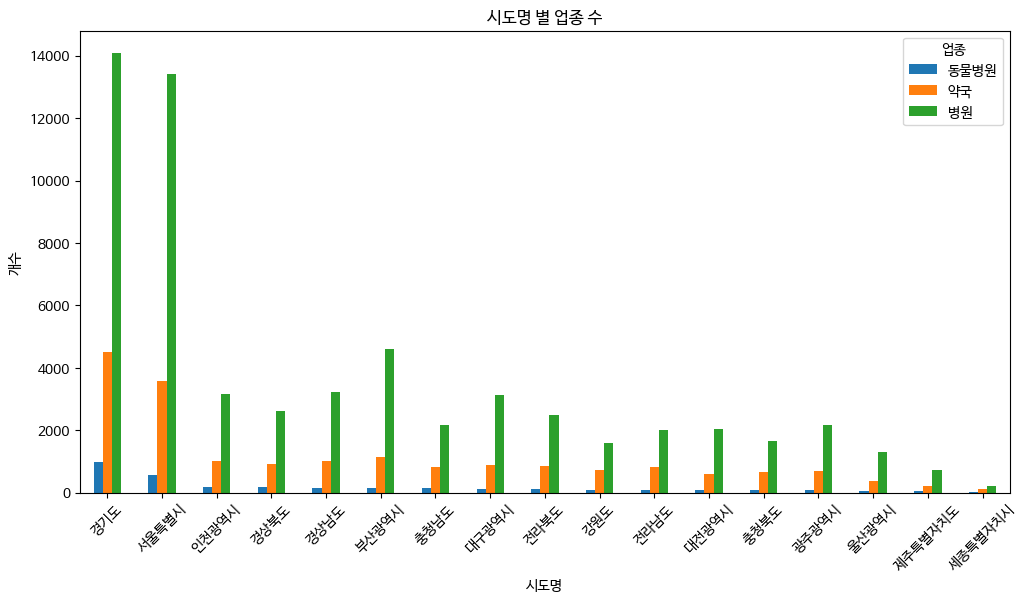

In [ ]:
hosp = df[df['상권업종중분류명'] == '병원']['시도명']
vet = df[df['상권업종소분류명'] == '동물병원']['시도명']

hosp_cnt = hosp.value_counts()
vet_cnt = vet.value_counts()

res_df_2 = pd.DataFrame({'동물병원': vet_cnt, '약국': pharm_cnt, '병원': hosp_cnt}).fillna(0)
res_df_2 = res_df_2.sort_values(by='동물병원', ascending=False)
# print(res_df_2)

res_df_2.plot(kind='bar', figsize=(12, 6))
plt.title("시도명 별 업종 수")
plt.xlabel("시도명")
plt.xticks(rotation=45)
plt.ylabel("개수")
plt.legend(title='업종')
plt.show()

---
### Q3. 강남지역 피부과/성형외과의 비율 확인하기
- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명 찾기
- 비율은 피부과 `성형외과 수 / 전체병원 수`로 오름차순 정렬
- `round`를 이용하여 소숫점 두 번째짜리까지 출력하기

In [ ]:
seoul_hosp = df[df['상권업종중분류명'].str.contains('병원') & df['시도명'].str.contains('서울특별시')]
seoul_hosp_cnt = seoul_hosp['시군구명'].value_counts()
# print(seoul_hosp_cnt)

seoul_beuty = seoul_hosp[seoul_hosp['상권업종소분류명'].str.contains('피부|성형')][['시군구명', '상권업종소분류명']]
seoul_beuty_cnt = seoul_beuty['시군구명'].value_counts()
# print(seoul_beuty_cnt)

res_df_3 = pd.DataFrame({'피부/성형': seoul_beuty_cnt, '병원': seoul_hosp_cnt, '비율': seoul_beuty_cnt/seoul_hosp_cnt}).fillna(0)
res_df_3 = res_df_3.sort_values(by='비율', ascending=False).round(2)
res_df_3

,피부/성형,병원,비율
강남구,603,2550,0.24
서초구,200,1196,0.17
마포구,40,456,0.09
서대문구,29,379,0.08
영등포구,39,516,0.08
강동구,37,494,0.07
중구,31,423,0.07
중랑구,21,307,0.07
강서구,38,579,0.07
양천구,26,398,0.07


---
### Q4. 지도상에 노인/치매병원 시각화하기
- `folium` 이용하기
- [folium 문서](https://python-visualization.github.io/folium/quickstart.html)

In [ ]:
import folium

map = folium.Map(location=[36, 128], zoom_start=7)
marker_group = folium.FeatureGroup("Marker", show=False).add_to(map)

senior_hosp = df[df['상권업종소분류명']=='노인/치매병원'][['상호명', '도로명주소', '위도', '경도']]

for i, row in senior_hosp.iterrows():
    # tooltip을 이용해 추가 정보 제공
    tooltip_html = f"<b>{row['상호명']}</b><br>{row['도로명주소']}"

    folium.Marker(
        location=[row['위도'], row['경도']],
        tooltip=tooltip_html,
    ).add_to(marker_group)

map